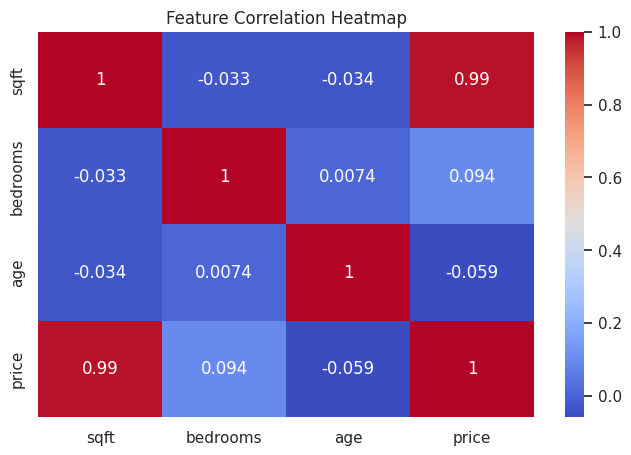

🔍 Model Performance:

Linear Regression: R² = 0.99, MSE = 79082681.86
Ridge Regression: R² = 0.99, MSE = 79202914.21
Lasso Regression: R² = 0.99, MSE = 79082775.07
Random Forest: R² = 0.98, MSE = 171505620.88


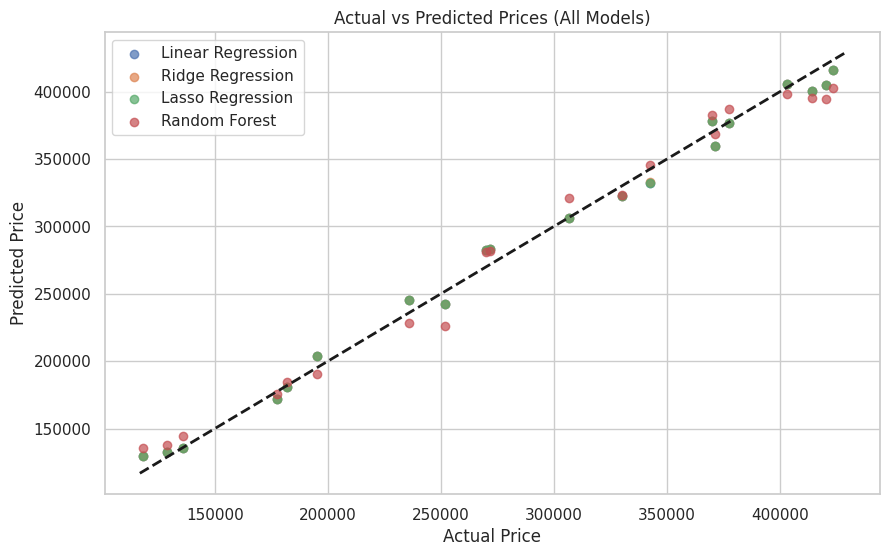

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


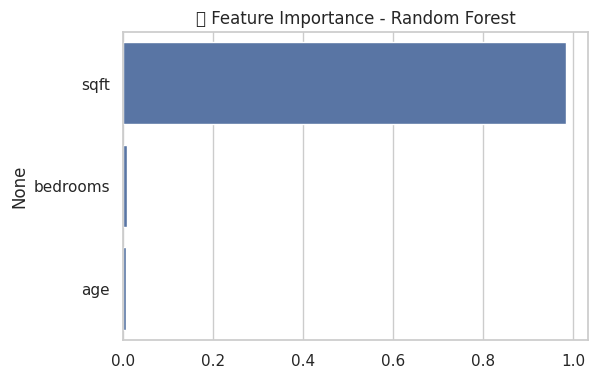

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Set style
sns.set(style="whitegrid")

# -------------------------------
# 1. Load/Create Dataset
# -------------------------------
np.random.seed(0)
sqft = np.random.randint(500, 3500, 100)
bedrooms = np.random.randint(1, 5, 100)
age = np.random.randint(1, 30, 100)
price = 50000 + (sqft * 100) + (bedrooms * 10000) - (age * 300) + np.random.randint(-15000, 15000, 100)

data = pd.DataFrame({
    'sqft': sqft,
    'bedrooms': bedrooms,
    'age': age,
    'price': price
})

# -------------------------------
# 2. Visualize Dataset
# -------------------------------
plt.figure(figsize=(8, 5))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# -------------------------------
# 3. Train-Test Split
# -------------------------------
X = data[['sqft', 'bedrooms', 'age']]
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------------------
# 4. Initialize Models
# -------------------------------
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# -------------------------------
# 5. Train, Predict, Evaluate
# -------------------------------
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {
        'model': model,
        'MSE': round(mse, 2),
        'R2': round(r2, 2)
    }

# -------------------------------
# 6. Show Evaluation Results
# -------------------------------
print("🔍 Model Performance:\n")
for name, res in results.items():
    print(f"{name}: R² = {res['R2']}, MSE = {res['MSE']}")

# -------------------------------
# 7. Visual Comparison
# -------------------------------
plt.figure(figsize=(10, 6))
for name, res in results.items():
    y_pred = res['model'].predict(X_test)
    plt.scatter(y_test, y_pred, label=name, alpha=0.7)

plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices (All Models)")
plt.legend()
plt.show()

# -------------------------------
# 8. Feature Importance (Random Forest)
# -------------------------------
rf_model = results['Random Forest']['model']
feature_importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(6, 4))
sns.barplot(x=feature_importances, y=features)
plt.title("🔎 Feature Importance - Random Forest")
plt.show()
